# Agregación de datos por categoría

In [5]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male","Famale"]
income = ["Poor","Middle Class","Rich"]

In [3]:
n = 500
gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [11]:
gender_data[0:10]

['Famale',
 'Famale',
 'Famale',
 'Male',
 'Male',
 'Famale',
 'Male',
 'Famale',
 'Male',
 'Famale']

In [10]:
income_data[0:10]

['Middle Class',
 'Poor',
 'Rich',
 'Poor',
 'Poor',
 'Poor',
 'Rich',
 'Poor',
 'Poor',
 'Middle Class']

In [27]:
#Z -> N(0,1)
# N(n,s) .> m + s * z
height = 160 + 30 * np.random.randn(n) 
weight = 65 + 35* np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [28]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight": weight,
        "Age" : age,
        "Income" : income
    }
)

In [29]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Famale,Middle Class,114.568597,91.967480,36.007970,19053.247760
1,Famale,Poor,129.617922,54.985976,15.165654,17223.010704
2,Famale,Rich,137.015391,52.376387,21.574901,18545.557352
3,Male,Poor,183.464511,80.481074,37.134853,21577.663358
4,Male,Poor,159.995020,67.631659,53.582084,15759.975653


# Agrupación de datos

In [31]:
grouped_gender = data.groupby("Gender")

In [32]:
grouped_gender.groups

{'Famale': Int64Index([  0,   1,   2,   5,   7,   9,  10,  12,  13,  15,
             ...
             479, 481, 489, 492, 493, 494, 495, 496, 497, 499],
            dtype='int64', length=227),
 'Male': Int64Index([  3,   4,   6,   8,  11,  14,  17,  20,  22,  24,
             ...
             482, 483, 484, 485, 486, 487, 488, 490, 491, 498],
            dtype='int64', length=273)}

In [34]:
for names,groups in grouped_gender:
    print(names)
    print(groups)

Famale
     Gender Economic Status      Height      Weight        Age        Income
0    Famale    Middle Class  114.568597   91.967480  36.007970  19053.247760
1    Famale            Poor  129.617922   54.985976  15.165654  17223.010704
2    Famale            Rich  137.015391   52.376387  21.574901  18545.557352
5    Famale            Poor  161.248079   95.753171  22.262381  18913.590590
7    Famale            Poor  146.022835   43.221859  38.401199  10339.187511
..      ...             ...         ...         ...        ...           ...
494  Famale            Poor  175.680802   76.809134  23.134843  18178.648896
495  Famale            Rich  147.399945   27.046794  27.054453  14485.809848
496  Famale    Middle Class  120.900192  109.233151  31.970188  15418.793644
497  Famale            Poor   97.476301   30.587236  40.748617  13359.647723
499  Famale            Rich  194.456051    4.874292  43.596674  11992.148680

[227 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [35]:
grouped_gender.get_group("Famale")

,Economic Status,Height,Weight,Age,Income
0,Middle Class,114.568597,91.967480,36.007970,19053.247760
1,Poor,129.617922,54.985976,15.165654,17223.010704
2,Rich,137.015391,52.376387,21.574901,18545.557352
5,Poor,161.248079,95.753171,22.262381,18913.590590
7,Poor,146.022835,43.221859,38.401199,10339.187511
...,...,...,...,...,...
494,Poor,175.680802,76.809134,23.134843,18178.648896
495,Rich,147.399945,27.046794,27.054453,14485.809848
496,Middle Class,120.900192,109.233151,31.970188,15418.793644
497,Poor,97.476301,30.587236,40.748617,13359.647723


In [36]:
double_group = data.groupby(["Gender","Economic Status"])

In [37]:
len(double_group)

6

In [38]:
for names,groups in double_group:
    print(names)
    print(groups)

('Famale', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
0    Famale    Middle Class  114.568597   91.967480  36.007970  19053.247760
9    Famale    Middle Class  165.342760   12.843135  33.717056  14121.815568
10   Famale    Middle Class  179.934274  102.834787  32.208549  16305.599280
12   Famale    Middle Class  117.209115   97.015300  42.631712  15710.283168
13   Famale    Middle Class  153.952680   60.646138  23.000480  21995.133562
..      ...             ...         ...         ...        ...           ...
479  Famale    Middle Class  220.074818   62.264773  25.075431  20385.539459
489  Famale    Middle Class  166.316007   57.615830  37.885372  14123.826377
492  Famale    Middle Class  247.509428   27.859273  28.557290  14612.277210
493  Famale    Middle Class  116.128480   70.819414  42.468695  18867.826081
496  Famale    Middle Class  120.900192  109.233151  31.970188  15418.793644

[83 rows x 6 columns]
('Famale', 'Poor')
     Ge

## Operacion sobre datos agrupados

In [39]:
# suma de los grupos
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Famale Middle Class     12877.914314  5351.280670  2377.130876  1.474858e+06
       Poor             12139.053710  5228.265865  2202.275239  1.328346e+06
       Rich             11609.210676  4025.103269  2157.945918  1.284253e+06
Male   Middle Class     15158.934844  5986.237918  2909.259545  1.696747e+06
       Poor             14656.648440  5333.622476  2927.343187  1.628744e+06
       Rich             14268.055552  5641.666619  2686.483394  1.645083e+06

In [40]:
#Promedio de los grupos
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Famale Middle Class     155.155594  64.473261  28.640131  17769.374812
       Poor             168.597968  72.614804  30.587156  18449.247357
       Rich             161.239037  55.904212  29.971471  17836.845065
Male   Middle Class     161.265264  63.683382  30.949570  18050.504150
       Poor             162.851649  59.262472  32.526035  18097.154411
       Rich             160.315231  63.389513  30.185207  18484.075206

In [41]:
# cuantos elementos tienen cada grupo
double_group.size()

Gender  Economic Status
Famale  Middle Class       83
        Poor               72
        Rich               72
Male    Middle Class       94
        Poor               90
        Rich               89
dtype: int64

In [42]:
#Obtener los estadisticos básicos
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Famale Middle Class      83.0  155.155594  32.613546   86.180165  129.949594   
       Poor              72.0  168.597968  33.174436   97.476301  146.052785   
       Rich              72.0  161.239037  28.780440   87.029060  144.173389   
Male   Middle Class      94.0  161.265264  28.302304  108.204511  140.357433   
       Poor              90.0  162.851649  31.534492   80.180868  145.136438   
       Rich              89.0  160.315231  28.893206   89.072212  142.605651   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Famale Middle Class     151.767035  180.045265  247.509428   83.0  64.473261   
       Poor             164.741097  184.308617  272.523771   72.0  72.614804   
       Rich             161.730432  175.120713  230.617890   72.0  55.904212   
Male   Middle Class     160.621740  178.125984  230.517421   94.0  63.683382   
       Poor             158.653750  182.566551  253.960428   90.0  59.262472   
       Rich             160.854085  179.262776  240.680778   89.0  63.389513   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Famale Middle Class     ...  36.202832  59.257721   83.0  17769.374812   
       Poor             ...  40.415100  47.393673   72.0  18449.247357   
       Rich             ...  37.471908  53.865810   72.0  17836.845065   
Male   Middle Class     ...  40.852464  57.303697   94.0  18050.504150   
       Poor             ...  39.163891  56.951013   90.0  18097.154411   
       Rich             ...  39.444509  59.559645   89.0  18484.075206   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Famale Middle Class     3435.395721   8796.014206  14980.990977  18267.823223   
       Poor             3818.737677  10339.187511  15849.489759  18774.567291   
       Rich             3382.931571  10107.330394  15972.831666  17389.296333   
Male   Middle Class     3567.532773   9856.916118  15656.028260  18070.612170   
       Poor             3411.629863   9869.610113  15869.292218  17914.368552   
       Rich             3264.680313  11831.124212  16104.270120  18321.453509   

                                                    
                                 75%           max  
Gender Economic Status                              
Famale Middle Class     20086.766759  25198.103113  
       Poor             20203.232357  26702.067208  
       Rich             19932.118926  26071.512057  
Male   Middle Class     20633.005022  27606.375971  
       Poor             20106.093094  25278.699221  
       Rich             21389.612578  24956.608487  

[6 rows x 32 columns]

In [48]:
grouped_income = double_group["Income"]

In [49]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Famale Middle Class      83.0  17769.374812  3435.395721   8796.014206   
       Poor              72.0  18449.247357  3818.737677  10339.187511   
       Rich              72.0  17836.845065  3382.931571  10107.330394   
Male   Middle Class      94.0  18050.504150  3567.532773   9856.916118   
       Poor              90.0  18097.154411  3411.629863   9869.610113   
       Rich              89.0  18484.075206  3264.680313  11831.124212   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Famale Middle Class     14980.990977  18267.823223  20086.766759  25198.103113  
       Poor             15849.489759  18774.567291  20203.232357  26702.067208  
       Rich             15972.831666  17389.296333  19932.118926  26071.512057  
Male   Middle Class     15656.028260  18070.612170  20633.005022  27606.375971  
       Poor             15869.292218  17914.368552  20106.093094  25278.699221  
       Rich             16104.270120  18321.453509  21389.612578  24956.608487

In [50]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    
    }
)

Income        Age     Height
Gender Economic Status                                    
Famale Middle Class     1.474858e+06  28.640131  32.613546
       Poor             1.328346e+06  30.587156  33.174436
       Rich             1.284253e+06  29.971471  28.780440
Male   Middle Class     1.696747e+06  30.949570  28.302304
       Poor             1.628744e+06  32.526035  31.534492
       Rich             1.645083e+06  30.185207  28.893206

In [51]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height": lambda h:np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Famale Middle Class     28.640131  4.786318
       Poor             30.587156  5.117830
       Rich             29.971471  5.641698
Male   Middle Class     30.949570  5.728508
       Poor             32.526035  5.193170
       Rich             30.185207  5.579981

In [53]:
#Se aplica la funcion a todas las variables
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Famale Middle Class     12877.914314  155.155594  32.613546  5351.280670   
       Poor             12139.053710  168.597968  33.174436  5228.265865   
       Rich             11609.210676  161.239037  28.780440  4025.103269   
Male   Middle Class     15158.934844  161.265264  28.302304  5986.237918   
       Poor             14656.648440  162.851649  31.534492  5333.622476   
       Rich             14268.055552  160.315231  28.893206  5641.666619   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Famale Middle Class     64.473261  34.357266  2377.130876  28.640131   
       Poor             72.614804  31.922185  2202.275239  30.587156   
       Rich             55.904212  42.106812  2157.945918  29.971471   
Male   Middle Class     63.683382  31.339635  2909.259545  30.949570   
       Poor             59.262472  28.588387  2927.343187  32.526035   
       Rich             63.389513  33.147029  2686.483394  30.185207   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Famale Middle Class     11.516652  1.474858e+06  17769.374812  3435.395721  
       Poor             11.096531  1.328346e+06  18449.247357  3818.737677  
       Rich             10.683277  1.284253e+06  17836.845065  3382.931571  
Male   Middle Class     12.514244  1.696747e+06  18050.504150  3567.532773  
       Poor             11.230916  1.628744e+06  18097.154411  3411.629863  
       Rich             13.195999  1.645083e+06  18484.075206  3264.680313

In [54]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Famale Middle Class     4.786318  1.887962  2.501963  5.203883
       Poor             5.117830  2.290707  2.775805  4.865146
       Rich             5.641698  1.336993  2.825144  5.309601
Male   Middle Class     5.728508  2.042935  2.486408  5.086790
       Poor             5.193170  2.084569  2.912341  5.334266
       Rich             5.579981  1.923209  2.300412  5.693912

# Filtrado de datos

In [55]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Famale Middle Class     12877.914314  5351.280670  2377.130876  1.474858e+06
       Poor             12139.053710  5228.265865  2202.275239  1.328346e+06
       Rich             11609.210676  4025.103269  2157.945918  1.284253e+06
Male   Middle Class     15158.934844  5986.237918  2909.259545  1.696747e+06
       Poor             14656.648440  5333.622476  2927.343187  1.628744e+06
       Rich             14268.055552  5641.666619  2686.483394  1.645083e+06

In [57]:
double_group["Age"].filter(lambda x: x.sum() > 2400)

3      37.134853
4      53.582084
6      28.084271
8      53.044715
11     45.896819
         ...    
487    29.628532
488    30.622080
490    20.499339
491    30.834902
498    29.123379
Name: Age, Length: 273, dtype: float64

# Transformación matemática de variables

In [64]:
zscore = lambda x : ( x - x.mean())/x.std()

In [66]:
z_group = double_group.transform(zscore)

In [10]:
import matplotlib.pyplot as plt

(array([  1.,   5.,  22.,  54.,  87., 119., 107.,  71.,  26.,   8.]),
 array([-3.44423383, -2.83395549, -2.22367714, -1.6133988 , -1.00312046,
        -0.39284211,  0.21743623,  0.82771458,  1.43799292,  2.04827126,
         2.65854961]),
 <a list of 10 Patch objects>)

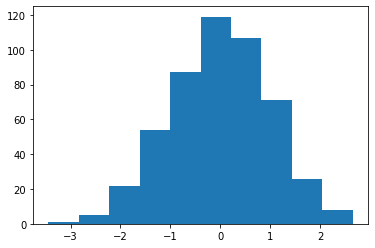

In [68]:
plt.hist(z_group["Age"])

In [69]:
# reemplazar los datos que son NA con el promedio de los demás datos
fill_na_mean = lambda x : x.fillna(x.mean())

In [70]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,114.568597,91.967480,36.007970,19053.247760
1,129.617922,54.985976,15.165654,17223.010704
2,137.015391,52.376387,21.574901,18545.557352
3,183.464511,80.481074,37.134853,21577.663358
4,159.995020,67.631659,53.582084,15759.975653
...,...,...,...,...
495,147.399945,27.046794,27.054453,14485.809848
496,120.900192,109.233151,31.970188,15418.793644
497,97.476301,30.587236,40.748617,13359.647723
498,132.291407,56.621978,29.123379,22603.279846


## Operaciones diversas muy útiles

In [71]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Famale,Middle Class,114.568597,91.967480,36.007970,19053.247760
1,Famale,Poor,129.617922,54.985976,15.165654,17223.010704
2,Famale,Rich,137.015391,52.376387,21.574901,18545.557352
3,Male,Poor,183.464511,80.481074,37.134853,21577.663358
6,Male,Rich,155.319953,69.632285,28.084271,16720.708677
11,Male,Middle Class,202.823680,60.662216,45.896819,17819.936018


In [72]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
488,Male,Middle Class,132.156297,85.032226,30.622080,13162.506430
491,Male,Rich,200.028276,-3.300092,30.834902,21389.612578
496,Famale,Middle Class,120.900192,109.233151,31.970188,15418.793644
497,Famale,Poor,97.476301,30.587236,40.748617,13359.647723
498,Male,Poor,132.291407,56.621978,29.123379,22603.279846
499,Famale,Rich,194.456051,4.874292,43.596674,11992.148680


In [75]:
#buscar el elemento n del grupo
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Famale Middle Class     104.355618  67.258515  24.388948  18794.880910
       Poor             125.912179  97.049405  26.639933  18526.162347
       Rich             182.592791  78.732678  23.486010  16082.595067
Male   Middle Class     110.511167  81.208928  43.196135  15495.876602
       Poor             152.638165  76.811241  32.101296  17887.900364
       Rich             179.262776  42.268321  16.253204  13481.131958

In [76]:
data_sorted = data.sort_values(["Age","Income"])

In [78]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
351,Famale,Middle Class,123.029321,14.501150,-11.025910,18289.172024
299,Male,Rich,176.988025,55.458310,-4.842435,24956.608487
333,Famale,Middle Class,180.749108,23.088931,-1.106815,14875.904141
117,Male,Rich,160.813772,91.694540,1.150659,22124.244955
42,Famale,Poor,165.492961,87.005695,1.327365,19320.036695
467,Famale,Rich,108.702864,111.625302,3.843362,19016.820583
394,Male,Middle Class,230.517421,57.491499,5.577612,20846.988762
321,Male,Middle Class,133.347380,-20.455969,6.520167,16622.901203
199,Famale,Middle Class,181.359894,60.397019,6.901931,14362.400684
438,Famale,Poor,168.093635,31.324545,7.286886,20021.497124


In [79]:
age_grouped = data_sorted.groupby("Gender")

In [80]:
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
351,Famale,Middle Class,123.029321,14.501150,-11.025910,18289.172024
299,Male,Rich,176.988025,55.458310,-4.842435,24956.608487
333,Famale,Middle Class,180.749108,23.088931,-1.106815,14875.904141
117,Male,Rich,160.813772,91.694540,1.150659,22124.244955
42,Famale,Poor,165.492961,87.005695,1.327365,19320.036695
467,Famale,Rich,108.702864,111.625302,3.843362,19016.820583
394,Male,Middle Class,230.517421,57.491499,5.577612,20846.988762
321,Male,Middle Class,133.347380,-20.455969,6.520167,16622.901203
199,Famale,Middle Class,181.359894,60.397019,6.901931,14362.400684
434,Male,Poor,99.301051,20.570353,7.431087,15850.072638


In [81]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
166,Famale,Middle Class,213.550588,-6.355262,59.257721,19413.609688
222,Male,Rich,161.630389,106.922124,59.559645,21504.033293


In [82]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
351,Famale,Middle Class,123.029321,14.50115,-11.025910,18289.172024
299,Male,Rich,176.988025,55.45831,-4.842435,24956.608487


In [6]:
 data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [84]:
len(data)

3333

# Dividir utilizando la distribución normal

In [7]:
#array en una distribucion normal 
a = np.random.randn(len(data))

In [8]:
a

array([ 0.54767475,  0.38269843,  2.05787657, ...,  1.09546309,
       -0.07713729, -0.21011007])

(array([ 30., 114., 385., 763., 947., 706., 298.,  77.,  11.,   2.]),
 array([-3.27741533, -2.53231465, -1.78721396, -1.04211328, -0.29701259,
         0.44808809,  1.19318878,  1.93828946,  2.68339015,  3.42849084,
         4.17359152]),
 <a list of 10 Patch objects>)

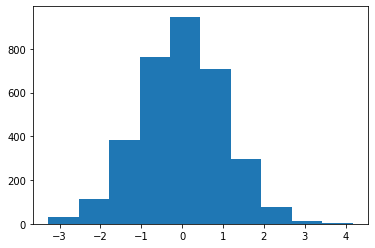

In [11]:
plt.hist(a)

In [12]:
#array bool con una condicion
check  = (a<0.75)

In [13]:
check

array([ True,  True, False, ..., False,  True,  True])

In [14]:
training = data[check]
testing = data[~check]

In [16]:
len(training)

2576

In [17]:
len(testing)

757

# Con la libreria Sklearn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, test = train_test_split(data,test_size =0.2)

In [23]:
len(train)

2666

In [24]:
len(test)

667

# Usando una función de shuffle

In [27]:
import numpy as np

In [28]:
# mezclar las filas aleatorias
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [30]:
import sklearn

In [31]:
#mezclamos las variables
sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
564,CT,66,415,417-7973,no,yes,29,229.4,104,39.00,...,84,21.88,231.5,119,10.42,8.0,1,2.16,2,False.
1042,FL,91,510,387-9855,yes,yes,24,93.5,112,15.90,...,128,15.59,240.7,133,10.83,9.9,3,2.67,0,False.
2261,IA,100,408,378-9478,no,no,0,210.9,85,35.85,...,69,27.99,127.1,78,5.72,9.4,5,2.54,4,False.
1418,OH,29,415,397-3058,yes,yes,37,235.0,101,39.95,...,79,15.58,139.8,106,6.29,5.7,7,1.54,2,False.
1497,MT,114,510,393-3274,no,no,0,189.8,101,32.27,...,80,12.55,172.7,121,7.77,10.6,5,2.86,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,VT,46,408,373-3538,no,no,0,196.7,85,33.44,...,74,17.50,216.6,112,9.75,11.2,5,3.02,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
2986,OR,89,415,357-8515,no,yes,12,188.0,105,31.96,...,107,12.86,201.9,132,9.09,10.5,3,2.84,2,False.
1238,OH,147,415,365-5682,yes,yes,24,219.9,118,37.38,...,116,17.72,352.5,111,15.86,8.1,4,2.19,3,False.


In [33]:
cut_id = int(0.75* len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [34]:
len(train_data)

2499

In [35]:
len(test_data)

833